# System tools to herd the dumps into something useful

In [2]:
%pylab nbagg

import os
import re

from topas2numpy import read_ntuple
from datetime import datetime
from pylab import figure, cm
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


## Making a new analysis directory

In [4]:
now = datetime.now()

dt_string = now.strftime("%Y-%m-%d-h%Hm%M")

print(dt_string)

os.mkdir(f'analysis/{dt_string}')

2020-08-24-h10m01


## Reformat the dump

In [102]:
!rename -e 's/\d+/sprintf("%04d",$&)/e' -- *.csv
!ls *.csv | grep -o '[0-9][0-9]*' > energies.txt
!cat *.csv | awk 'NR % 6 == 0' > deposition.txt
!rename -e 's/\d+/sprintf("%04d",$&)/e' -- *.phsp
!rename -e 's/\d+/sprintf("%04d",$&)/e' -- *.header

In [4]:
#!cat energies.txt deposition.txt
#!cat deposition.txt

In [103]:
with open('energies.txt') as f:
    energies = np.array([[x for x in line.split()] for line in f]).astype(np.float).flatten()
    
with open('deposition.txt') as f:
    array = np.array([[x for x in line.split()] for line in f]).flatten()
    deposition = array.astype(np.float)

In [104]:
np.save(f'analysis/{dt_string}/EnergyDeposition.npy',[deposition,energies])

<IPython.core.display.Javascript object>


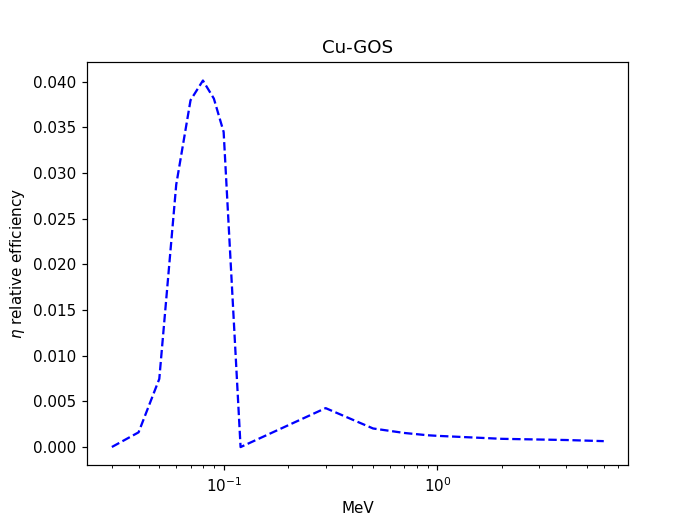

Text(0.5, 1.0, 'Cu-GOS')

In [105]:
plt.figure()
plt.semilogx(energies/1000,deposition/(energies/1000)/3000000,'b--')
plt.xlabel('MeV')                                                       
plt.ylabel('$\eta$ relative efficiency')
# plt.savefig(f'analysis/{dt_string}/EnergyDeposition.png')
plt.title('Cu-GOS')

<IPython.core.display.Javascript object>


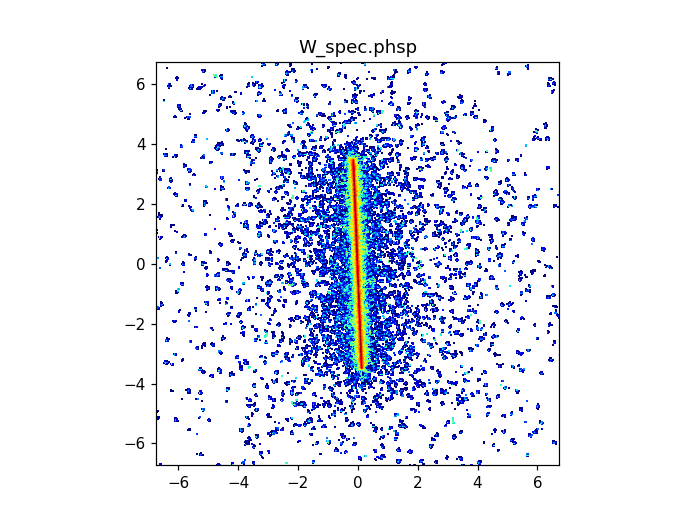

In [3]:
rootdir = "."
regex = re.compile('(.*.phsp$)|(.*rar$)|(.*r01$)')

phase_spaces = []
plt.figure()

# xedges = np.linspace(-1.5876+0.0196,1.5876-0.0196,40) # Changed from 82 JO 2020 07
# yedges = np.linspace(-1.5876+0.0196,1.5876-0.0196,40) # Changed from 40 JO 08


# edges_forward = (np.arange(0.0392,81*0.0782,0.0782))

# edges_forward = (np.arange(0.0196,201*0.0392,0.0392))

edges_forward = (np.arange(0.0168,201*0.0336,0.0336))

# edges_forward = (np.arange(0.001,551*0.002,0.002))

edges = np.hstack([-1*edges_forward[-1::-1], edges_forward])

xedges = edges #np.linspace(-2,2,201) # Changed from 82 JO 2020 07
yedges = edges #np.linspace(-2,2,201) # Changed from 40 JO 08

for root, dirs, files in os.walk(rootdir):
    for file in files:
        if regex.match(file):
            
            y = read_ntuple(os.path.join(rootdir,file))
#             xx = [y[kk][0] for kk in range(y.size)]
#             yy = [y[kk][1] for kk in range(y.size)]
            
            h,xs,yx,ima = plt.hist2d(y['Local position X [cm]'],y['Local position Y [cm]'], bins = [xedges,yedges], cmap=cm.jet, norm=LogNorm())
            plt.title(f'{file}')
            plt.axis('image')
#             plt.savefig(f'analysis/{dt_string}/{file}.png')
            
#             np.save(f'analysis/{dt_string}/{file}',h)


In [4]:
plt.close('all')

<IPython.core.display.Javascript object>


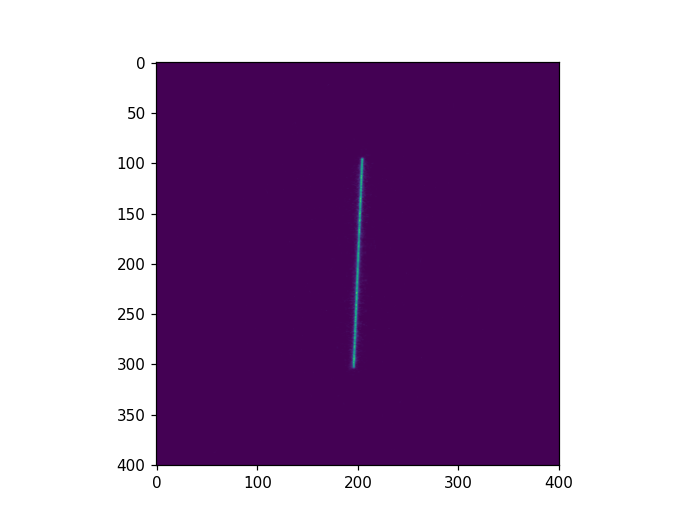

In [5]:
figure()
imshow(h.T)

In [5]:
xx = [(xs[ii] + xs[ii+1])/2 for ii in range(h.shape[0])]
yy = [(yx[ii] + yx[ii+1])/2 for ii in range(h.shape[0])]

mesh = meshgrid(xx,yy)

In [6]:
mesh_adj = mesh[0] + tan(2.3*pi/180)*mesh[1]

<IPython.core.display.Javascript object>


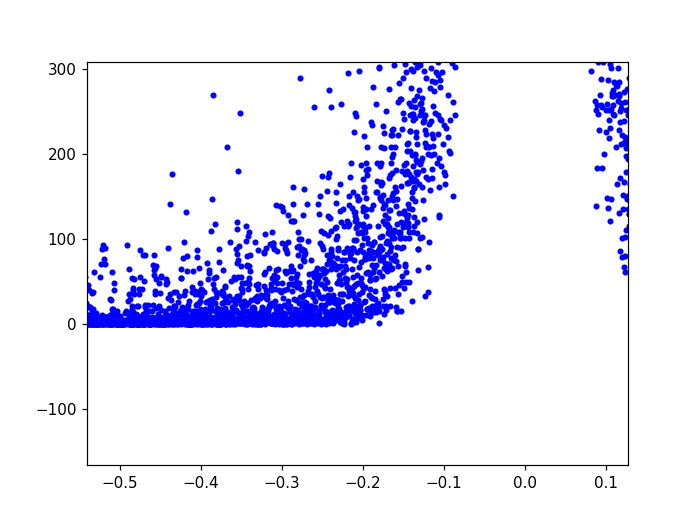

In [7]:
plt.figure()
plt.plot(mesh_adj[116:280,:],h.T[116:280,:],'b.');

In [9]:
inds = np.argsort(mesh_adj[100:300,:].flatten())
line = mesh_adj[100:300,:].flatten()[inds]
lsf = h.T[100:300,:].flatten()[inds]

<IPython.core.display.Javascript object>


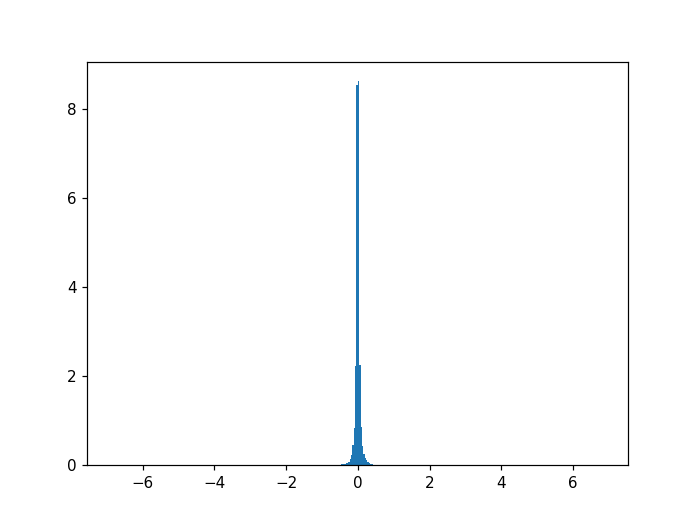

In [10]:
figure()
n,bins,patches = plt.hist(line,360,weights=lsf,density=True)

<IPython.core.display.Javascript object>


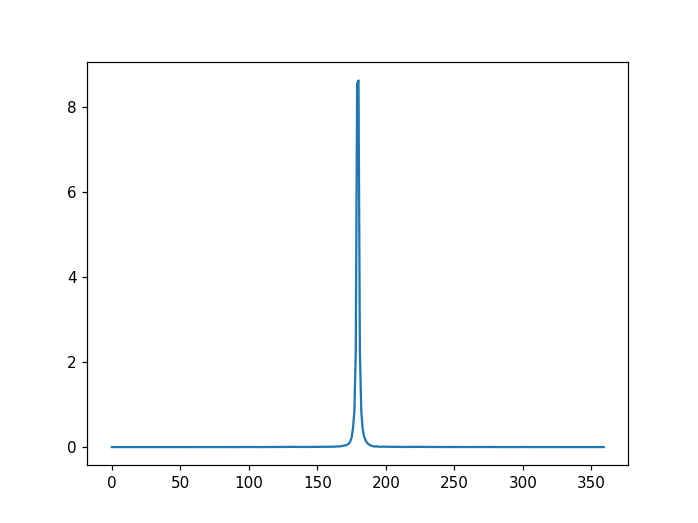

In [11]:
figure()
plot(n)

In [143]:
plt.close('all')

<IPython.core.display.Javascript object>


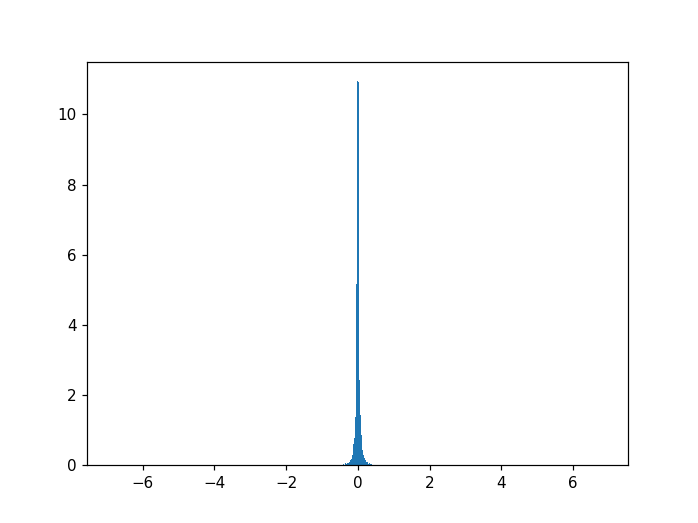

<IPython.core.display.Javascript object>


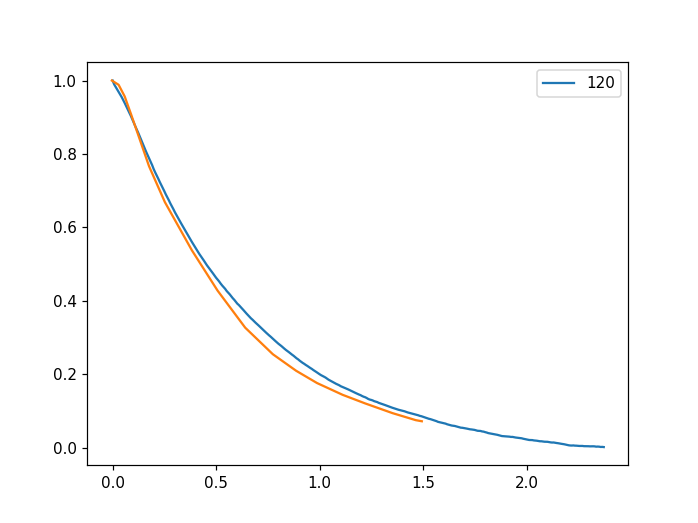

In [167]:
for ii in [650]:
    
    plt.figure()
    n,bins,patches = plt.hist(line,ii,weights=lsf,density=True)

    mtf = np.absolute(np.fft.fft(n))
    mtf_final = np.fft.fftshift(mtf)

    N = len(mtf)

    T = np.mean(np.diff(bins))

    xf = np.linspace(0.0, 1.0/(2.0*T), int((N-1)/2))

    mm = np.argmax(mtf_final)

    plt.figure()
    plt.plot(xf/10,mtf_final[mm+1:]/mtf_final[mm+1])
    plt.legend(['120','6000'])
    # plt.xlim([0,15])

    shi_data = [-0.0036600255852107244, 0.9985732893897139,
    0.028883896178828306, 0.9869637814824851,
    0.05821655345648036, 0.9552964008777066,
    0.08921020960640147, 0.9064175751164883,
    0.1218386383306087, 0.8532306428065635,
    0.17567540002389503, 0.7655438897096748,
    0.25229698659836164, 0.6677232950720785,
    0.38264460160796343, 0.5366967103480229,
    0.5064443842210934, 0.42720366468803805,
    0.6399828654853176, 0.326270882689769,
    0.7734630660873568, 0.25401218648646273,
    0.8857495038858628, 0.20908478962137955,
    0.9866304160947875, 0.17567598283051677,
    1.1102728409200182, 0.14360296881693158,
    1.2192635072719695, 0.1201951236569948,
    1.3510244283395543, 0.09382195840509122,
    1.4632584135420945, 0.07470123875547463,
    1.4925327901575614, 0.07170794394565894]

    shi_x = shi_data[::2]
    shi_y = shi_data[1::2]

    star_data = [0.0043086409992885155, 0.9784172661870504,
    0.07416396553087196, 0.8705035971223021,
    0.17022689540675146, 0.7248201438848921,
    0.2729860067989565, 0.6025179856115108,
    0.3736105620997708, 0.4946043165467626,
    0.4502174084907898, 0.42266187050359716,
    0.5312593880939205, 0.3597122302158273,
    0.6364455688196695, 0.289568345323741,
    0.7394971934540282, 0.23381294964028776,
    0.8491659419716973, 0.1834532374100719,
    0.9786465333227923, 0.14028776978417268,
    1.1191240414261996, 0.09892086330935257,
    1.2442801802514032, 0.07194244604316546,
    1.2904024033520434, 0.06474820143884896]

    star_x = star_data[::2]
    star_y = star_data[1::2]

#     plt.plot(star_x,np.array(star_y)/star_y[0])
    plt.plot(shi_x,np.array(shi_y)/shi_y[0])


<IPython.core.display.Javascript object>


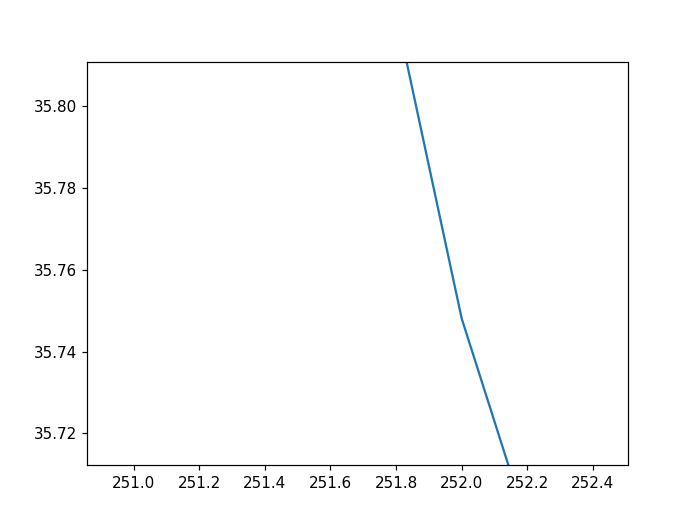

In [110]:
figure()
plt.plot(mtf_final)

In [111]:
argmax(mtf_final)

250

In [75]:
inds = np.argsort(mesh_adj[100:300,:].flatten())
line = mesh_adj[100:300,:].flatten()[inds]
lsf = h.T[100:300,:].flatten()[inds]

chunk = 20

line_small = [np.mean(line[ii:ii+chunk]) for ii in range(0,len(line),chunk)]
lsf_small = [np.mean(lsf[ii:ii+chunk]) for ii in range(0,len(line),chunk)]

<IPython.core.display.Javascript object>


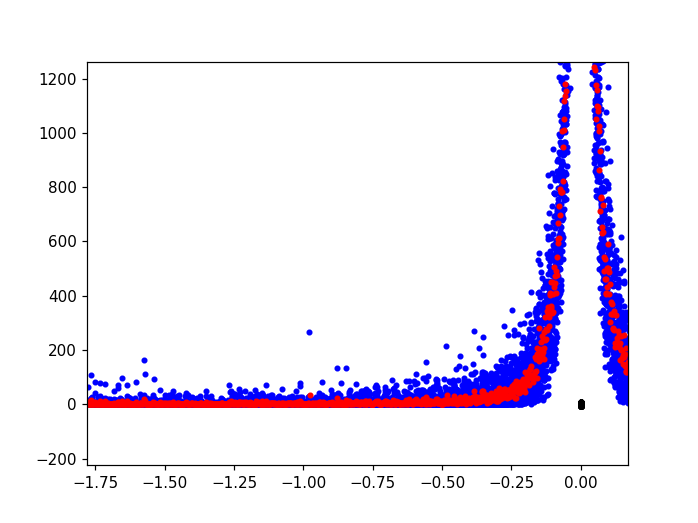

In [81]:
plt.figure()
plt.plot(mesh_adj[100:300,:],h.T[100:300,:],'b.')
plt.plot(line_small,lsf_small,'r.')

from scipy import signal

lsf_resamp, line_resamp = signal.resample(lsf_small, 600, t= line_small)
plt.plot(line_resamp,lsf_resamp,'g.')
# lsf_resamp, line_resamp = signal.resample(line, 600, t = lsf)
plt.plot(line_resamp,lsf_resamp,'k.')

<IPython.core.display.Javascript object>


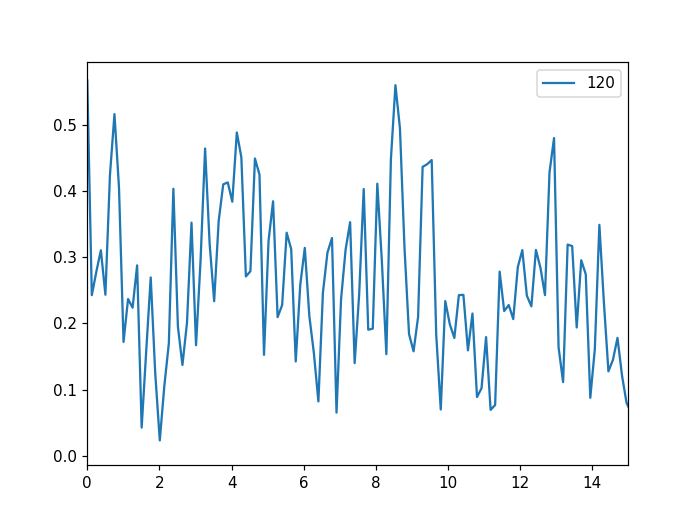

(0.0, 15.0)

In [9]:
# mtf = np.absolute(np.fft.fft(np.convolve(lsf,[0.2]*5)))
# mtf_final = np.fft.fftshift(mtf)

# N = len(mtf)

# T = 0.01

# xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

# mm = np.argmax(mtf_final)
# plt.figure()
# plt.plot(mtf_final[mm:]/mtf_final[mm])

mtf = np.absolute(np.fft.fft(lsf))
mtf_final = np.fft.fftshift(mtf)

N = len(mtf)

T = 0.02

xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

mm = np.argmax(mtf_final)

plt.figure()
plt.plot(xf,mtf_final[mm+1:]/mtf_final[mm])
plt.legend(['120','6000'])
plt.xlim([0,15])

# mtf = np.absolute(np.fft.fft(lsf2))
# mtf_final = np.fft.fftshift(mtf)

# N = len(mtf)

# T = 0.0336

# xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

# mm = np.argmax(mtf_final)

# # plt.figure()
# plt.plot(xf,mtf_final[mm+1:]/mtf_final[mm])
# plt.legend(['120','6000'])
# plt.xlim([0,15])

In [49]:
len(xf[:mm+1])

150

In [51]:
len(xf)

150

<IPython.core.display.Javascript object>


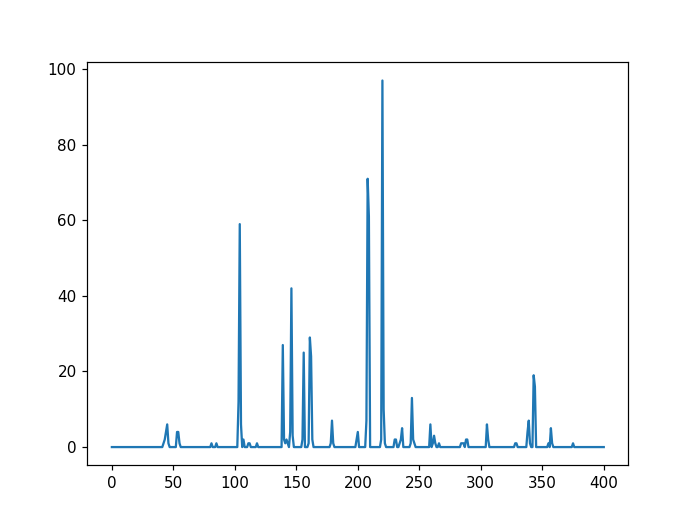

In [10]:
plt.figure()
plt.plot(h[150,:])
# plt.plot(h[41,:])
# plt.plot(h[42,:])

In [ ]:
from PIL import Image
import glob

# Create the frames
frames = []
imgs = sorted(glob.glob("analysis/2020-06-03-h14m33/*.png"))

for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('png_to_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

In [10]:
!cat ~/anaconda3/lib/python3.7/site-packages/topas2numpy/ntuple.py

# -*- coding: utf-8 -*-

# system imports
import re
import os.path

# third-party imports
import numpy as np

re_uint = '\d+'
re_str = '[\S+ \t]+'

binary_old_int_columns = [
    'Particle Type (in PDG Format)',
    'Run ID',
    'Event ID',
    'Track ID',
    'Parent ID',
    'Seed Part 1',
    'Seed Part 2',
    'Seed Part 3',
    'Seed Part 4',
]

limited_col_names = [
    ('Particle Type (sign from z direction)', np.int8),
    ('Energy (MeV) (-ve if new history)', 'f'),
    ('Position X (cm)', 'f'),
    ('Position Y (cm)', 'f'),
    ('Position Z (cm)', 'f'),
    ('Direction Cosine X', 'f'),
    ('Direction Cosine Y', 'f'),
    ('Weight', 'f'),
]


def read_ntuple(filepath):
    root, ext = os.path.splitext(filepath)
    ntuple_path = root + '.phsp'
    header_path = root + '.header'

    file_format, col_names = _sniff_format(header_path)

    if file_format == 'ascii':
        # preserve column names => cannot be viewed as a np.recarray
        # http://docs.scipy.org/doc/numpy-1

In [11]:
file

'PhotodiodeSurface_keV_6000.phsp'

In [12]:
!pwd

/home/xcite/topas/scintillators/Cu-GOS/runs


In [13]:
68372568/2848857

24.0

In [14]:
150398688/6266612

24.0

In [15]:
7437024/24

309876.0

In [36]:
xedges = np.linspace(-1.5876+0.0196,1.5876-0.0196,41)

(max(xedges) - min(xedges))/40

0.0784

In [34]:
0.25*0.784

0.196